In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data = load_iris()

In [2]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df = df.astype(float)

In [3]:
df['y'] = data.target
df['y'] = df.y.replace(dict(enumerate(data.target_names)))
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
Y = pd.get_dummies(df['y'], prefix='Y')
Y

,Y_setosa,Y_versicolor,Y_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [5]:
df = pd.concat([df,Y],axis=1) # concat 다시공부
df.drop(['y'],axis=1,inplace=True) # 받아주거나 inplace 둘 중 하나만 써야한다. 둘다 쓰면 안된다.

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Y_setosa,Y_versicolor,Y_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [7]:
X_data = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
X_data = np.asarray(X_data)
Y_data = df[['Y_setosa','Y_versicolor','Y_virginica']]
Y_data = np.asarray(Y_data)

In [8]:
X_data.shape, Y_data.shape

((150, 4), (150, 3))

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
m = Sequential()
m.add(Dense(64,input_shape=(4,),activation='relu'))
m.add(Dense(128,activation='relu'))
m.add(Dense(128,activation='relu'))
m.add(Dense(64,activation='relu'))
m.add(Dense(64,activation='relu'))
m.add(Dense(3,activation='softmax'))
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 37,763
Trainable params: 37,763
Non-trainable params: 0
____________________________________________________

In [10]:
t_x,tt_x,t_y,tt_y = train_test_split(X_data,Y_data,test_size=0.2,random_state=1) #트레이닝 테스트 7:3, 트레이닝 검증 8:2

In [11]:
t_x.shape

(120, 4)

In [12]:
m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hy = m.fit(t_x,t_y,validation_split=0.2,batch_size=40,epochs=1000,verbose=2) # 검증데이터 자동으로 추출 
# 배치 사이즈는 보통 2의 제곱수로 사용 
#verbose 0는 안나오고, 1은 늘 보던거 , 2는 수치값만, 나머지는 0과 동급

Epoch 1/1000
3/3 - 0s - loss: 1.0543 - accuracy: 0.4688 - val_loss: 1.0143 - val_accuracy: 0.5417
Epoch 2/1000
3/3 - 0s - loss: 0.9038 - accuracy: 0.7292 - val_loss: 0.9283 - val_accuracy: 0.5417
Epoch 3/1000
3/3 - 0s - loss: 0.8074 - accuracy: 0.7292 - val_loss: 0.8696 - val_accuracy: 0.5417
Epoch 4/1000
3/3 - 0s - loss: 0.7134 - accuracy: 0.7292 - val_loss: 0.7977 - val_accuracy: 0.5417
Epoch 5/1000
3/3 - 0s - loss: 0.6158 - accuracy: 0.7292 - val_loss: 0.6925 - val_accuracy: 0.5417
Epoch 6/1000
3/3 - 0s - loss: 0.5232 - accuracy: 0.7292 - val_loss: 0.5845 - val_accuracy: 0.5833
Epoch 7/1000
3/3 - 0s - loss: 0.4509 - accuracy: 0.8438 - val_loss: 0.4924 - val_accuracy: 0.8333
Epoch 8/1000
3/3 - 0s - loss: 0.3834 - accuracy: 0.8229 - val_loss: 0.4916 - val_accuracy: 0.7083
Epoch 9/1000
3/3 - 0s - loss: 0.3382 - accuracy: 0.8438 - val_loss: 0.3847 - val_accuracy: 0.9167
Epoch 10/1000
3/3 - 0s - loss: 0.3154 - accuracy: 0.9688 - val_loss: 0.3858 - val_accuracy: 0.8750
Epoch 11/1000
3/3 -

Epoch 84/1000
3/3 - 0s - loss: 0.1287 - accuracy: 0.9271 - val_loss: 0.1404 - val_accuracy: 0.8750
Epoch 85/1000
3/3 - 0s - loss: 0.0861 - accuracy: 0.9583 - val_loss: 0.5647 - val_accuracy: 0.8333
Epoch 86/1000
3/3 - 0s - loss: 0.2194 - accuracy: 0.8958 - val_loss: 0.1419 - val_accuracy: 0.8750
Epoch 87/1000
3/3 - 0s - loss: 0.0571 - accuracy: 0.9688 - val_loss: 0.4251 - val_accuracy: 0.8333
Epoch 88/1000
3/3 - 0s - loss: 0.1315 - accuracy: 0.9479 - val_loss: 0.1466 - val_accuracy: 0.9167
Epoch 89/1000
3/3 - 0s - loss: 0.0589 - accuracy: 0.9792 - val_loss: 0.4250 - val_accuracy: 0.8750
Epoch 90/1000
3/3 - 0s - loss: 0.2080 - accuracy: 0.9062 - val_loss: 0.2319 - val_accuracy: 0.9167
Epoch 91/1000
3/3 - 0s - loss: 0.0828 - accuracy: 0.9792 - val_loss: 0.2486 - val_accuracy: 0.9167
Epoch 92/1000
3/3 - 0s - loss: 0.1394 - accuracy: 0.9271 - val_loss: 0.1753 - val_accuracy: 0.9167
Epoch 93/1000
3/3 - 0s - loss: 0.0922 - accuracy: 0.9792 - val_loss: 0.2757 - val_accuracy: 0.9167
Epoch 94/1

Epoch 167/1000
3/3 - 0s - loss: 0.0507 - accuracy: 0.9896 - val_loss: 0.2690 - val_accuracy: 0.9167
Epoch 168/1000
3/3 - 0s - loss: 0.0555 - accuracy: 0.9792 - val_loss: 0.1987 - val_accuracy: 0.9167
Epoch 169/1000
3/3 - 0s - loss: 0.0401 - accuracy: 0.9896 - val_loss: 0.2768 - val_accuracy: 0.9167
Epoch 170/1000
3/3 - 0s - loss: 0.0485 - accuracy: 0.9896 - val_loss: 0.2595 - val_accuracy: 0.9167
Epoch 171/1000
3/3 - 0s - loss: 0.0427 - accuracy: 0.9896 - val_loss: 0.1870 - val_accuracy: 0.8750
Epoch 172/1000
3/3 - 0s - loss: 0.0421 - accuracy: 0.9792 - val_loss: 0.1737 - val_accuracy: 0.8750
Epoch 173/1000
3/3 - 0s - loss: 0.0546 - accuracy: 0.9792 - val_loss: 0.1810 - val_accuracy: 0.8333
Epoch 174/1000
3/3 - 0s - loss: 0.0446 - accuracy: 0.9896 - val_loss: 0.3616 - val_accuracy: 0.9167
Epoch 175/1000
3/3 - 0s - loss: 0.0593 - accuracy: 0.9688 - val_loss: 0.2364 - val_accuracy: 0.9167
Epoch 176/1000
3/3 - 0s - loss: 0.0395 - accuracy: 0.9896 - val_loss: 0.1885 - val_accuracy: 0.8333


Epoch 249/1000
3/3 - 0s - loss: 0.0433 - accuracy: 0.9792 - val_loss: 0.2872 - val_accuracy: 0.8750
Epoch 250/1000
3/3 - 0s - loss: 0.0495 - accuracy: 0.9792 - val_loss: 0.2244 - val_accuracy: 0.8333
Epoch 251/1000
3/3 - 0s - loss: 0.0525 - accuracy: 0.9792 - val_loss: 0.3591 - val_accuracy: 0.9167
Epoch 252/1000
3/3 - 0s - loss: 0.0399 - accuracy: 0.9896 - val_loss: 0.4296 - val_accuracy: 0.8750
Epoch 253/1000
3/3 - 0s - loss: 0.0396 - accuracy: 0.9896 - val_loss: 0.3168 - val_accuracy: 0.8750
Epoch 254/1000
3/3 - 0s - loss: 0.0341 - accuracy: 0.9896 - val_loss: 0.3612 - val_accuracy: 0.8750
Epoch 255/1000
3/3 - 0s - loss: 0.0318 - accuracy: 0.9896 - val_loss: 0.4501 - val_accuracy: 0.8750
Epoch 256/1000
3/3 - 0s - loss: 0.0366 - accuracy: 0.9896 - val_loss: 0.3838 - val_accuracy: 0.9167
Epoch 257/1000
3/3 - 0s - loss: 0.0331 - accuracy: 0.9896 - val_loss: 0.3723 - val_accuracy: 0.8750
Epoch 258/1000
3/3 - 0s - loss: 0.0310 - accuracy: 0.9896 - val_loss: 0.4655 - val_accuracy: 0.8750


Epoch 331/1000
3/3 - 0s - loss: 0.0262 - accuracy: 0.9896 - val_loss: 0.6675 - val_accuracy: 0.8750
Epoch 332/1000
3/3 - 0s - loss: 0.0440 - accuracy: 0.9792 - val_loss: 0.4179 - val_accuracy: 0.8333
Epoch 333/1000
3/3 - 0s - loss: 0.0515 - accuracy: 0.9792 - val_loss: 0.3383 - val_accuracy: 0.8333
Epoch 334/1000
3/3 - 0s - loss: 0.0356 - accuracy: 0.9792 - val_loss: 0.7076 - val_accuracy: 0.8333
Epoch 335/1000
3/3 - 0s - loss: 0.0533 - accuracy: 0.9688 - val_loss: 0.5124 - val_accuracy: 0.8333
Epoch 336/1000
3/3 - 0s - loss: 0.0266 - accuracy: 0.9896 - val_loss: 0.4244 - val_accuracy: 0.8333
Epoch 337/1000
3/3 - 0s - loss: 0.0342 - accuracy: 0.9896 - val_loss: 0.4362 - val_accuracy: 0.8333
Epoch 338/1000
3/3 - 0s - loss: 0.0435 - accuracy: 0.9896 - val_loss: 0.6808 - val_accuracy: 0.8333
Epoch 339/1000
3/3 - 0s - loss: 0.0335 - accuracy: 0.9896 - val_loss: 0.4127 - val_accuracy: 0.8333
Epoch 340/1000
3/3 - 0s - loss: 0.0343 - accuracy: 0.9792 - val_loss: 0.3077 - val_accuracy: 0.8333


Epoch 413/1000
3/3 - 0s - loss: 0.0895 - accuracy: 0.9583 - val_loss: 0.4593 - val_accuracy: 0.8333
Epoch 414/1000
3/3 - 0s - loss: 0.0452 - accuracy: 0.9792 - val_loss: 0.3454 - val_accuracy: 0.8333
Epoch 415/1000
3/3 - 0s - loss: 0.0484 - accuracy: 0.9792 - val_loss: 0.5378 - val_accuracy: 0.8333
Epoch 416/1000
3/3 - 0s - loss: 0.0301 - accuracy: 0.9896 - val_loss: 0.6965 - val_accuracy: 0.8333
Epoch 417/1000
3/3 - 0s - loss: 0.0329 - accuracy: 1.0000 - val_loss: 0.5652 - val_accuracy: 0.8333
Epoch 418/1000
3/3 - 0s - loss: 0.0283 - accuracy: 0.9896 - val_loss: 0.5682 - val_accuracy: 0.8333
Epoch 419/1000
3/3 - 0s - loss: 0.0285 - accuracy: 0.9896 - val_loss: 0.6851 - val_accuracy: 0.8333
Epoch 420/1000
3/3 - 0s - loss: 0.0272 - accuracy: 1.0000 - val_loss: 0.5731 - val_accuracy: 0.8333
Epoch 421/1000
3/3 - 0s - loss: 0.0249 - accuracy: 0.9896 - val_loss: 0.5456 - val_accuracy: 0.8333
Epoch 422/1000
3/3 - 0s - loss: 0.0260 - accuracy: 0.9896 - val_loss: 0.5825 - val_accuracy: 0.8333


Epoch 495/1000
3/3 - 0s - loss: 0.0481 - accuracy: 0.9792 - val_loss: 1.0904 - val_accuracy: 0.8333
Epoch 496/1000
3/3 - 0s - loss: 0.0484 - accuracy: 0.9688 - val_loss: 0.7695 - val_accuracy: 0.8333
Epoch 497/1000
3/3 - 0s - loss: 0.0352 - accuracy: 0.9896 - val_loss: 0.4331 - val_accuracy: 0.8333
Epoch 498/1000
3/3 - 0s - loss: 0.0874 - accuracy: 0.9792 - val_loss: 0.4430 - val_accuracy: 0.8333
Epoch 499/1000
3/3 - 0s - loss: 0.0685 - accuracy: 0.9792 - val_loss: 0.6824 - val_accuracy: 0.8333
Epoch 500/1000
3/3 - 0s - loss: 0.0360 - accuracy: 0.9792 - val_loss: 1.0511 - val_accuracy: 0.8333
Epoch 501/1000
3/3 - 0s - loss: 0.0448 - accuracy: 0.9792 - val_loss: 0.5942 - val_accuracy: 0.8333
Epoch 502/1000
3/3 - 0s - loss: 0.0576 - accuracy: 0.9792 - val_loss: 0.4075 - val_accuracy: 0.8333
Epoch 503/1000
3/3 - 0s - loss: 0.0724 - accuracy: 0.9792 - val_loss: 0.4673 - val_accuracy: 0.7917
Epoch 504/1000
3/3 - 0s - loss: 0.0428 - accuracy: 0.9792 - val_loss: 0.7990 - val_accuracy: 0.8333


Epoch 577/1000
3/3 - 0s - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.9000 - val_accuracy: 0.8333
Epoch 578/1000
3/3 - 0s - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.9084 - val_accuracy: 0.8333
Epoch 579/1000
3/3 - 0s - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.9780 - val_accuracy: 0.7917
Epoch 580/1000
3/3 - 0s - loss: 0.0217 - accuracy: 1.0000 - val_loss: 0.9291 - val_accuracy: 0.8333
Epoch 581/1000
3/3 - 0s - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.8937 - val_accuracy: 0.8333
Epoch 582/1000
3/3 - 0s - loss: 0.0235 - accuracy: 0.9792 - val_loss: 1.0034 - val_accuracy: 0.8333
Epoch 583/1000
3/3 - 0s - loss: 0.0127 - accuracy: 1.0000 - val_loss: 1.0333 - val_accuracy: 0.7917
Epoch 584/1000
3/3 - 0s - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.9967 - val_accuracy: 0.8333
Epoch 585/1000
3/3 - 0s - loss: 0.0098 - accuracy: 1.0000 - val_loss: 1.0297 - val_accuracy: 0.8333
Epoch 586/1000
3/3 - 0s - loss: 0.0145 - accuracy: 0.9896 - val_loss: 1.0272 - val_accuracy: 0.8333


Epoch 659/1000
3/3 - 0s - loss: 0.0196 - accuracy: 0.9896 - val_loss: 0.8476 - val_accuracy: 0.8333
Epoch 660/1000
3/3 - 0s - loss: 0.0139 - accuracy: 1.0000 - val_loss: 1.0139 - val_accuracy: 0.8333
Epoch 661/1000
3/3 - 0s - loss: 0.0494 - accuracy: 0.9688 - val_loss: 0.6828 - val_accuracy: 0.7917
Epoch 662/1000
3/3 - 0s - loss: 0.0533 - accuracy: 0.9792 - val_loss: 0.6115 - val_accuracy: 0.7917
Epoch 663/1000
3/3 - 0s - loss: 0.0575 - accuracy: 0.9792 - val_loss: 0.7936 - val_accuracy: 0.8333
Epoch 664/1000
3/3 - 0s - loss: 0.0156 - accuracy: 0.9896 - val_loss: 1.1234 - val_accuracy: 0.8333
Epoch 665/1000
3/3 - 0s - loss: 0.0727 - accuracy: 0.9583 - val_loss: 0.7221 - val_accuracy: 0.8333
Epoch 666/1000
3/3 - 0s - loss: 0.0546 - accuracy: 0.9792 - val_loss: 0.4607 - val_accuracy: 0.8333
Epoch 667/1000
3/3 - 0s - loss: 0.0725 - accuracy: 0.9792 - val_loss: 0.6011 - val_accuracy: 0.7917
Epoch 668/1000
3/3 - 0s - loss: 0.0433 - accuracy: 0.9792 - val_loss: 0.8190 - val_accuracy: 0.8333


Epoch 741/1000
3/3 - 0s - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.2593 - val_accuracy: 0.8333
Epoch 742/1000
3/3 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.2505 - val_accuracy: 0.8333
Epoch 743/1000
3/3 - 0s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 1.2662 - val_accuracy: 0.8333
Epoch 744/1000
3/3 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.2952 - val_accuracy: 0.7917
Epoch 745/1000
3/3 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.3000 - val_accuracy: 0.8333
Epoch 746/1000
3/3 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.3131 - val_accuracy: 0.7917
Epoch 747/1000
3/3 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.3211 - val_accuracy: 0.7917
Epoch 748/1000
3/3 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.3179 - val_accuracy: 0.8333
Epoch 749/1000
3/3 - 0s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.3415 - val_accuracy: 0.7917
Epoch 750/1000
3/3 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.3374 - val_accuracy: 0.8333


Epoch 823/1000
3/3 - 0s - loss: 0.0092 - accuracy: 1.0000 - val_loss: 1.0154 - val_accuracy: 0.8333
Epoch 824/1000
3/3 - 0s - loss: 0.0106 - accuracy: 1.0000 - val_loss: 1.1444 - val_accuracy: 0.8333
Epoch 825/1000
3/3 - 0s - loss: 0.0081 - accuracy: 1.0000 - val_loss: 1.1813 - val_accuracy: 0.7917
Epoch 826/1000
3/3 - 0s - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.0865 - val_accuracy: 0.8333
Epoch 827/1000
3/3 - 0s - loss: 0.0130 - accuracy: 0.9896 - val_loss: 1.2249 - val_accuracy: 0.7917
Epoch 828/1000
3/3 - 0s - loss: 0.0244 - accuracy: 0.9896 - val_loss: 1.1981 - val_accuracy: 0.8333
Epoch 829/1000
3/3 - 0s - loss: 0.0132 - accuracy: 0.9896 - val_loss: 1.0246 - val_accuracy: 0.7917
Epoch 830/1000
3/3 - 0s - loss: 0.0412 - accuracy: 0.9792 - val_loss: 1.2355 - val_accuracy: 0.8333
Epoch 831/1000
3/3 - 0s - loss: 0.0128 - accuracy: 1.0000 - val_loss: 1.3110 - val_accuracy: 0.7917
Epoch 832/1000
3/3 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.1401 - val_accuracy: 0.8333


Epoch 905/1000
3/3 - 0s - loss: 4.8272e-04 - accuracy: 1.0000 - val_loss: 2.1345 - val_accuracy: 0.8333
Epoch 906/1000
3/3 - 0s - loss: 4.4502e-04 - accuracy: 1.0000 - val_loss: 2.1344 - val_accuracy: 0.8333
Epoch 907/1000
3/3 - 0s - loss: 4.7075e-04 - accuracy: 1.0000 - val_loss: 2.1379 - val_accuracy: 0.8333
Epoch 908/1000
3/3 - 0s - loss: 4.4368e-04 - accuracy: 1.0000 - val_loss: 2.1612 - val_accuracy: 0.8333
Epoch 909/1000
3/3 - 0s - loss: 4.1902e-04 - accuracy: 1.0000 - val_loss: 2.1796 - val_accuracy: 0.8333
Epoch 910/1000
3/3 - 0s - loss: 4.0656e-04 - accuracy: 1.0000 - val_loss: 2.1923 - val_accuracy: 0.8333
Epoch 911/1000
3/3 - 0s - loss: 3.9996e-04 - accuracy: 1.0000 - val_loss: 2.1932 - val_accuracy: 0.8333
Epoch 912/1000
3/3 - 0s - loss: 3.9058e-04 - accuracy: 1.0000 - val_loss: 2.1998 - val_accuracy: 0.8333
Epoch 913/1000
3/3 - 0s - loss: 3.9949e-04 - accuracy: 1.0000 - val_loss: 2.2184 - val_accuracy: 0.8333
Epoch 914/1000
3/3 - 0s - loss: 3.6586e-04 - accuracy: 1.0000 - 

Epoch 984/1000
3/3 - 0s - loss: 1.0606e-04 - accuracy: 1.0000 - val_loss: 2.8142 - val_accuracy: 0.8333
Epoch 985/1000
3/3 - 0s - loss: 1.0519e-04 - accuracy: 1.0000 - val_loss: 2.8217 - val_accuracy: 0.8333
Epoch 986/1000
3/3 - 0s - loss: 9.9059e-05 - accuracy: 1.0000 - val_loss: 2.8400 - val_accuracy: 0.8333
Epoch 987/1000
3/3 - 0s - loss: 1.0984e-04 - accuracy: 1.0000 - val_loss: 2.8608 - val_accuracy: 0.8333
Epoch 988/1000
3/3 - 0s - loss: 1.0577e-04 - accuracy: 1.0000 - val_loss: 2.8583 - val_accuracy: 0.8333
Epoch 989/1000
3/3 - 0s - loss: 9.8851e-05 - accuracy: 1.0000 - val_loss: 2.8610 - val_accuracy: 0.8333
Epoch 990/1000
3/3 - 0s - loss: 9.6032e-05 - accuracy: 1.0000 - val_loss: 2.8630 - val_accuracy: 0.8333
Epoch 991/1000
3/3 - 0s - loss: 9.4148e-05 - accuracy: 1.0000 - val_loss: 2.8624 - val_accuracy: 0.8333
Epoch 992/1000
3/3 - 0s - loss: 9.3766e-05 - accuracy: 1.0000 - val_loss: 2.8622 - val_accuracy: 0.8333
Epoch 993/1000
3/3 - 0s - loss: 9.6787e-05 - accuracy: 1.0000 - 

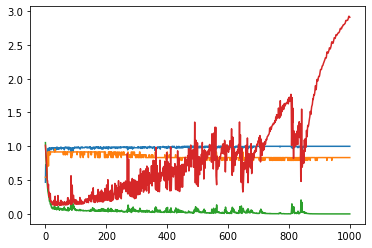

In [13]:
import matplotlib.pyplot as plt
plt.plot(hy.history['accuracy'])
plt.plot(hy.history['val_accuracy'])
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])

In [14]:
m.evaluate(tt_x,tt_y)

1/1 [==============================] - 0s 13ms/step - loss: 0.8963 - accuracy: 0.9333


[0.8962801694869995, 0.9333333373069763]

In [15]:
from tensorflow.keras.initializers import RandomNormal, Constant
m2 = Sequential()
m2.add(Dense(64,input_shape=(4,),activation='relu'))
m2.add(BatchNormalization())
m2.add(Dense(128,activation='relu'))
m2.add(BatchNormalization())
m2.add(Dense(128,activation='relu'))
m2.add(BatchNormalization())
m2.add(Dense(64,activation='relu'))
m2.add(BatchNormalization())
m2.add(Dense(64,activation='relu')) # y = ax+0.005
m2.add(BatchNormalization(momentum=0.95,epsilon=0.005,
                          beta_initializer=RandomNormal(mean=0.0,stddev=0.05),
                         gamma_initializer=Constant(value=0.9))) # momentum 1에 가까운 실수값
m2.add(Dense(3,activation='softmax'))
m2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                320       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

In [16]:
m2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hy2 = m2.fit(t_x,t_y,validation_split=0.2,batch_size=40,epochs=1000,verbose=2)

Epoch 1/1000
3/3 - 1s - loss: 0.8640 - accuracy: 0.6146 - val_loss: 1.2796 - val_accuracy: 0.2500
Epoch 2/1000
3/3 - 0s - loss: 0.2648 - accuracy: 0.8958 - val_loss: 1.3081 - val_accuracy: 0.2500
Epoch 3/1000
3/3 - 0s - loss: 0.1177 - accuracy: 0.9896 - val_loss: 1.3158 - val_accuracy: 0.2500
Epoch 4/1000
3/3 - 0s - loss: 0.0837 - accuracy: 1.0000 - val_loss: 1.3362 - val_accuracy: 0.2500
Epoch 5/1000
3/3 - 0s - loss: 0.0840 - accuracy: 0.9792 - val_loss: 1.3558 - val_accuracy: 0.2500
Epoch 6/1000
3/3 - 0s - loss: 0.0551 - accuracy: 0.9896 - val_loss: 1.3723 - val_accuracy: 0.2500
Epoch 7/1000
3/3 - 0s - loss: 0.0427 - accuracy: 0.9896 - val_loss: 1.3906 - val_accuracy: 0.2500
Epoch 8/1000
3/3 - 0s - loss: 0.1284 - accuracy: 0.9688 - val_loss: 1.3847 - val_accuracy: 0.2500
Epoch 9/1000
3/3 - 0s - loss: 0.0477 - accuracy: 0.9896 - val_loss: 1.3562 - val_accuracy: 0.2500
Epoch 10/1000
3/3 - 0s - loss: 0.0270 - accuracy: 1.0000 - val_loss: 1.3275 - val_accuracy: 0.2500
Epoch 11/1000
3/3 -

Epoch 84/1000
3/3 - 0s - loss: 0.0129 - accuracy: 0.9896 - val_loss: 0.8346 - val_accuracy: 0.5417
Epoch 85/1000
3/3 - 0s - loss: 0.0387 - accuracy: 0.9688 - val_loss: 0.6873 - val_accuracy: 0.5833
Epoch 86/1000
3/3 - 0s - loss: 0.0471 - accuracy: 0.9896 - val_loss: 0.3991 - val_accuracy: 0.7917
Epoch 87/1000
3/3 - 0s - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.3101 - val_accuracy: 0.8333
Epoch 88/1000
3/3 - 0s - loss: 0.0653 - accuracy: 0.9792 - val_loss: 0.2836 - val_accuracy: 0.8333
Epoch 89/1000
3/3 - 0s - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.2803 - val_accuracy: 0.7917
Epoch 90/1000
3/3 - 0s - loss: 0.0434 - accuracy: 0.9896 - val_loss: 0.2644 - val_accuracy: 0.8750
Epoch 91/1000
3/3 - 0s - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.2294 - val_accuracy: 0.9583
Epoch 92/1000
3/3 - 0s - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.2026 - val_accuracy: 0.9583
Epoch 93/1000
3/3 - 0s - loss: 0.0331 - accuracy: 0.9896 - val_loss: 0.1884 - val_accuracy: 0.9583
Epoch 94/1

Epoch 167/1000
3/3 - 0s - loss: 0.0453 - accuracy: 0.9896 - val_loss: 0.1465 - val_accuracy: 0.9167
Epoch 168/1000
3/3 - 0s - loss: 0.0431 - accuracy: 0.9792 - val_loss: 0.1568 - val_accuracy: 0.9167
Epoch 169/1000
3/3 - 0s - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.1664 - val_accuracy: 0.9167
Epoch 170/1000
3/3 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.1770 - val_accuracy: 0.9167
Epoch 171/1000
3/3 - 0s - loss: 0.0181 - accuracy: 1.0000 - val_loss: 0.1772 - val_accuracy: 0.9167
Epoch 172/1000
3/3 - 0s - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.1765 - val_accuracy: 0.9167
Epoch 173/1000
3/3 - 0s - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.1757 - val_accuracy: 0.9167
Epoch 174/1000
3/3 - 0s - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.1814 - val_accuracy: 0.8750
Epoch 175/1000
3/3 - 0s - loss: 0.0966 - accuracy: 0.9896 - val_loss: 0.2010 - val_accuracy: 0.8750
Epoch 176/1000
3/3 - 0s - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.2202 - val_accuracy: 0.9583


Epoch 249/1000
3/3 - 0s - loss: 0.0498 - accuracy: 0.9896 - val_loss: 0.4627 - val_accuracy: 0.9167
Epoch 250/1000
3/3 - 0s - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.5159 - val_accuracy: 0.8333
Epoch 251/1000
3/3 - 0s - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.5169 - val_accuracy: 0.8333
Epoch 252/1000
3/3 - 0s - loss: 0.0125 - accuracy: 0.9896 - val_loss: 0.4631 - val_accuracy: 0.8333
Epoch 253/1000
3/3 - 0s - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.4031 - val_accuracy: 0.8750
Epoch 254/1000
3/3 - 0s - loss: 0.0323 - accuracy: 0.9792 - val_loss: 0.3662 - val_accuracy: 0.8750
Epoch 255/1000
3/3 - 0s - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.4166 - val_accuracy: 0.9167
Epoch 256/1000
3/3 - 0s - loss: 0.0141 - accuracy: 1.0000 - val_loss: 0.4828 - val_accuracy: 0.9167
Epoch 257/1000
3/3 - 0s - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.4574 - val_accuracy: 0.9167
Epoch 258/1000
3/3 - 0s - loss: 0.0170 - accuracy: 1.0000 - val_loss: 0.3465 - val_accuracy: 0.9167


Epoch 331/1000
3/3 - 0s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.4990 - val_accuracy: 0.8750
Epoch 332/1000
3/3 - 0s - loss: 9.1348e-04 - accuracy: 1.0000 - val_loss: 0.4573 - val_accuracy: 0.8750
Epoch 333/1000
3/3 - 0s - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.4486 - val_accuracy: 0.8750
Epoch 334/1000
3/3 - 0s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.4299 - val_accuracy: 0.9167
Epoch 335/1000
3/3 - 0s - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.4155 - val_accuracy: 0.9167
Epoch 336/1000
3/3 - 0s - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4008 - val_accuracy: 0.9167
Epoch 337/1000
3/3 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.4031 - val_accuracy: 0.8750
Epoch 338/1000
3/3 - 0s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.4758 - val_accuracy: 0.8750
Epoch 339/1000
3/3 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.5518 - val_accuracy: 0.8750
Epoch 340/1000
3/3 - 0s - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.5807 - val_accuracy: 0.8

Epoch 413/1000
3/3 - 0s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1525 - val_accuracy: 0.9167
Epoch 414/1000
3/3 - 0s - loss: 0.0519 - accuracy: 0.9896 - val_loss: 0.1795 - val_accuracy: 0.8750
Epoch 415/1000
3/3 - 0s - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.2068 - val_accuracy: 0.9167
Epoch 416/1000
3/3 - 0s - loss: 5.6915e-04 - accuracy: 1.0000 - val_loss: 0.2251 - val_accuracy: 0.9167
Epoch 417/1000
3/3 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2432 - val_accuracy: 0.9167
Epoch 418/1000
3/3 - 0s - loss: 0.0390 - accuracy: 0.9792 - val_loss: 0.3113 - val_accuracy: 0.8750
Epoch 419/1000
3/3 - 0s - loss: 0.0335 - accuracy: 0.9896 - val_loss: 0.4954 - val_accuracy: 0.8750
Epoch 420/1000
3/3 - 0s - loss: 0.0375 - accuracy: 0.9896 - val_loss: 0.5556 - val_accuracy: 0.8750
Epoch 421/1000
3/3 - 0s - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.5142 - val_accuracy: 0.8333
Epoch 422/1000
3/3 - 0s - loss: 0.0253 - accuracy: 0.9896 - val_loss: 0.5112 - val_accuracy: 0.7

Epoch 495/1000
3/3 - 0s - loss: 0.0835 - accuracy: 0.9688 - val_loss: 0.6202 - val_accuracy: 0.8333
Epoch 496/1000
3/3 - 0s - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.4069 - val_accuracy: 0.8750
Epoch 497/1000
3/3 - 0s - loss: 0.0178 - accuracy: 0.9896 - val_loss: 0.3483 - val_accuracy: 0.9583
Epoch 498/1000
3/3 - 0s - loss: 0.0339 - accuracy: 0.9896 - val_loss: 0.3798 - val_accuracy: 0.8750
Epoch 499/1000
3/3 - 0s - loss: 0.0392 - accuracy: 0.9896 - val_loss: 0.3979 - val_accuracy: 0.9167
Epoch 500/1000
3/3 - 0s - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.4310 - val_accuracy: 0.9167
Epoch 501/1000
3/3 - 0s - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.4730 - val_accuracy: 0.9167
Epoch 502/1000
3/3 - 0s - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.4975 - val_accuracy: 0.9167
Epoch 503/1000
3/3 - 0s - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.5087 - val_accuracy: 0.9167
Epoch 504/1000
3/3 - 0s - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.5092 - val_accuracy: 0.9167


Epoch 577/1000
3/3 - 0s - loss: 0.0157 - accuracy: 0.9896 - val_loss: 0.3530 - val_accuracy: 0.8750
Epoch 578/1000
3/3 - 0s - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.2802 - val_accuracy: 0.8750
Epoch 579/1000
3/3 - 0s - loss: 0.0203 - accuracy: 1.0000 - val_loss: 0.2215 - val_accuracy: 0.9167
Epoch 580/1000
3/3 - 0s - loss: 0.0105 - accuracy: 0.9896 - val_loss: 0.2102 - val_accuracy: 0.9167
Epoch 581/1000
3/3 - 0s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.2079 - val_accuracy: 0.9167
Epoch 582/1000
3/3 - 0s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.2092 - val_accuracy: 0.9167
Epoch 583/1000
3/3 - 0s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.2030 - val_accuracy: 0.9167
Epoch 584/1000
3/3 - 0s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1961 - val_accuracy: 0.9167
Epoch 585/1000
3/3 - 0s - loss: 0.0131 - accuracy: 0.9896 - val_loss: 0.1921 - val_accuracy: 0.9167
Epoch 586/1000
3/3 - 0s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.2079 - val_accuracy: 0.9167


Epoch 659/1000
3/3 - 0s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.5816 - val_accuracy: 0.8750
Epoch 660/1000
3/3 - 0s - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.5773 - val_accuracy: 0.8750
Epoch 661/1000
3/3 - 0s - loss: 0.0323 - accuracy: 0.9792 - val_loss: 0.5714 - val_accuracy: 0.8750
Epoch 662/1000
3/3 - 0s - loss: 0.0476 - accuracy: 0.9688 - val_loss: 0.6206 - val_accuracy: 0.9167
Epoch 663/1000
3/3 - 0s - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.6683 - val_accuracy: 0.9167
Epoch 664/1000
3/3 - 0s - loss: 0.0295 - accuracy: 0.9792 - val_loss: 0.6437 - val_accuracy: 0.9167
Epoch 665/1000
3/3 - 0s - loss: 0.0151 - accuracy: 0.9896 - val_loss: 0.5433 - val_accuracy: 0.9167
Epoch 666/1000
3/3 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.4328 - val_accuracy: 0.9167
Epoch 667/1000
3/3 - 0s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.3420 - val_accuracy: 0.9167
Epoch 668/1000
3/3 - 0s - loss: 0.0437 - accuracy: 0.9896 - val_loss: 0.2157 - val_accuracy: 0.9167


Epoch 741/1000
3/3 - 0s - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.3479 - val_accuracy: 0.8750
Epoch 742/1000
3/3 - 0s - loss: 7.9865e-04 - accuracy: 1.0000 - val_loss: 0.3448 - val_accuracy: 0.8750
Epoch 743/1000
3/3 - 0s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3414 - val_accuracy: 0.8750
Epoch 744/1000
3/3 - 0s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3357 - val_accuracy: 0.8750
Epoch 745/1000
3/3 - 0s - loss: 8.6042e-04 - accuracy: 1.0000 - val_loss: 0.3317 - val_accuracy: 0.8750
Epoch 746/1000
3/3 - 0s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3282 - val_accuracy: 0.8750
Epoch 747/1000
3/3 - 0s - loss: 5.7204e-04 - accuracy: 1.0000 - val_loss: 0.3269 - val_accuracy: 0.8750
Epoch 748/1000
3/3 - 0s - loss: 4.2182e-04 - accuracy: 1.0000 - val_loss: 0.3260 - val_accuracy: 0.8750
Epoch 749/1000
3/3 - 0s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3263 - val_accuracy: 0.8750
Epoch 750/1000
3/3 - 0s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3305 - val_a

Epoch 823/1000
3/3 - 0s - loss: 0.0235 - accuracy: 0.9896 - val_loss: 0.1909 - val_accuracy: 0.9167
Epoch 824/1000
3/3 - 0s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1728 - val_accuracy: 0.9167
Epoch 825/1000
3/3 - 0s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1592 - val_accuracy: 0.9167
Epoch 826/1000
3/3 - 0s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.1466 - val_accuracy: 0.9167
Epoch 827/1000
3/3 - 0s - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.1386 - val_accuracy: 0.9167
Epoch 828/1000
3/3 - 0s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1346 - val_accuracy: 0.9167
Epoch 829/1000
3/3 - 0s - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.1351 - val_accuracy: 0.9167
Epoch 830/1000
3/3 - 0s - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.1382 - val_accuracy: 0.9167
Epoch 831/1000
3/3 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.1481 - val_accuracy: 0.9583
Epoch 832/1000
3/3 - 0s - loss: 0.0431 - accuracy: 0.9896 - val_loss: 0.1679 - val_accuracy: 0.9583


Epoch 904/1000
3/3 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2044 - val_accuracy: 0.8750
Epoch 905/1000
3/3 - 0s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.2072 - val_accuracy: 0.8750
Epoch 906/1000
3/3 - 0s - loss: 5.9310e-04 - accuracy: 1.0000 - val_loss: 0.2079 - val_accuracy: 0.8750
Epoch 907/1000
3/3 - 0s - loss: 2.8934e-04 - accuracy: 1.0000 - val_loss: 0.2087 - val_accuracy: 0.8750
Epoch 908/1000
3/3 - 0s - loss: 2.4129e-04 - accuracy: 1.0000 - val_loss: 0.2095 - val_accuracy: 0.8750
Epoch 909/1000
3/3 - 0s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.2156 - val_accuracy: 0.8750
Epoch 910/1000
3/3 - 0s - loss: 6.9254e-04 - accuracy: 1.0000 - val_loss: 0.2232 - val_accuracy: 0.8750
Epoch 911/1000
3/3 - 0s - loss: 2.0846e-04 - accuracy: 1.0000 - val_loss: 0.2273 - val_accuracy: 0.8750
Epoch 912/1000
3/3 - 0s - loss: 3.6262e-04 - accuracy: 1.0000 - val_loss: 0.2336 - val_accuracy: 0.8750
Epoch 913/1000
3/3 - 0s - loss: 4.5101e-04 - accuracy: 1.0000 - val_loss: 0.

Epoch 986/1000
3/3 - 0s - loss: 0.0103 - accuracy: 0.9896 - val_loss: 0.3163 - val_accuracy: 0.8750
Epoch 987/1000
3/3 - 0s - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3135 - val_accuracy: 0.8750
Epoch 988/1000
3/3 - 0s - loss: 8.0979e-04 - accuracy: 1.0000 - val_loss: 0.3024 - val_accuracy: 0.8750
Epoch 989/1000
3/3 - 0s - loss: 0.0179 - accuracy: 0.9896 - val_loss: 0.2958 - val_accuracy: 0.8750
Epoch 990/1000
3/3 - 0s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.2866 - val_accuracy: 0.8750
Epoch 991/1000
3/3 - 0s - loss: 8.8106e-04 - accuracy: 1.0000 - val_loss: 0.2851 - val_accuracy: 0.8750
Epoch 992/1000
3/3 - 0s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.2836 - val_accuracy: 0.8750
Epoch 993/1000
3/3 - 0s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2783 - val_accuracy: 0.8750
Epoch 994/1000
3/3 - 0s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2748 - val_accuracy: 0.8750
Epoch 995/1000
3/3 - 0s - loss: 0.0402 - accuracy: 0.9896 - val_loss: 0.2586 - val_accuracy:

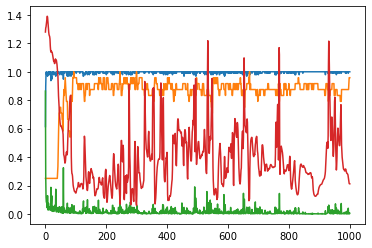

In [17]:
import matplotlib.pyplot as plt
plt.plot(hy2.history['accuracy'])
plt.plot(hy2.history['val_accuracy'])
plt.plot(hy2.history['loss'])
plt.plot(hy2.history['val_loss'])

In [18]:
m2.evaluate(tt_x,tt_y)

1/1 [==============================] - 0s 14ms/step - loss: 0.0100 - accuracy: 1.0000


[0.00998838059604168, 1.0]

결론 : batchnormalization 사용하면 안정적인 학습<br>
데이터 양이 많으면 더 명확하게 보인다